In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
wine_dataset = pd.read_csv('winequality-red.csv')

In [4]:
wine_dataset.shape

(1599, 12)

In [5]:
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<AxesSubplot:xlabel='quality', ylabel='count'>

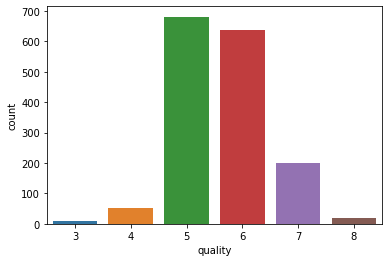

In [8]:
sns.countplot(x='quality', data = wine_dataset)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

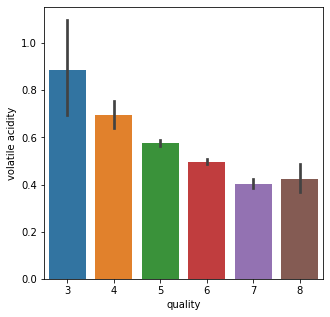

In [9]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'volatile acidity', data = wine_dataset)

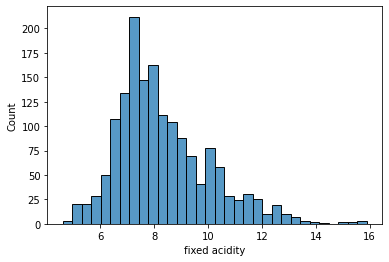

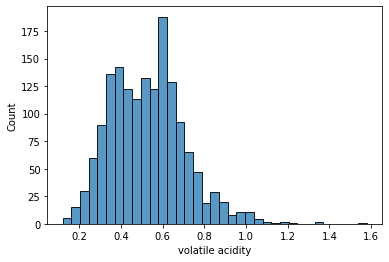

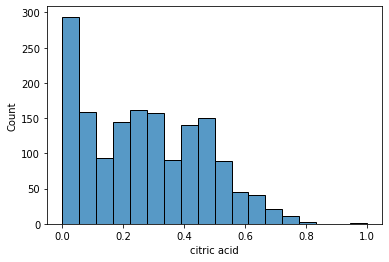

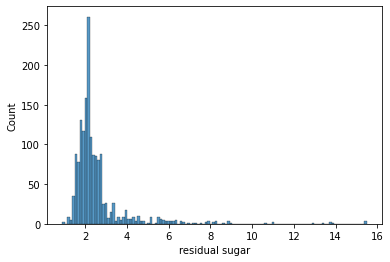

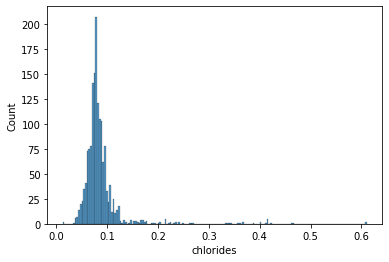

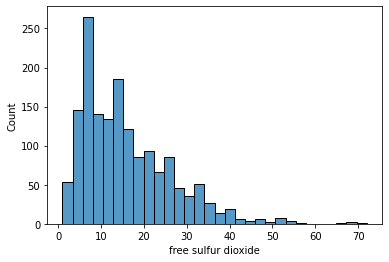

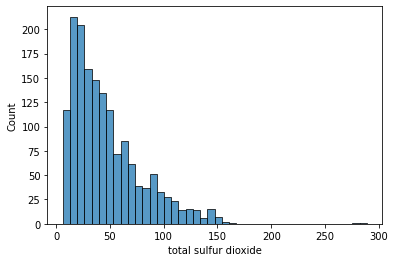

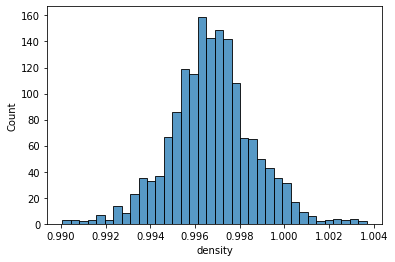

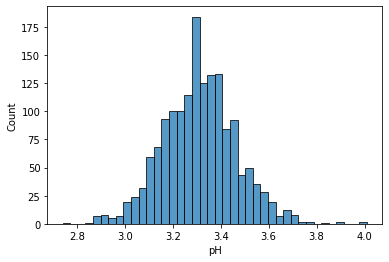

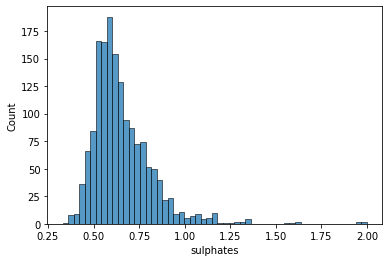

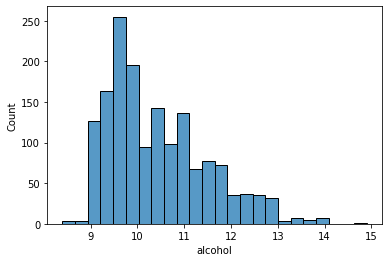

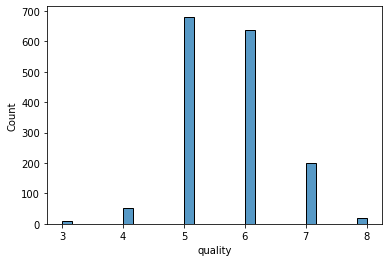

In [10]:
for i, col in enumerate(wine_dataset.columns):
    plt.figure(i)
    sns.histplot(wine_dataset[col])

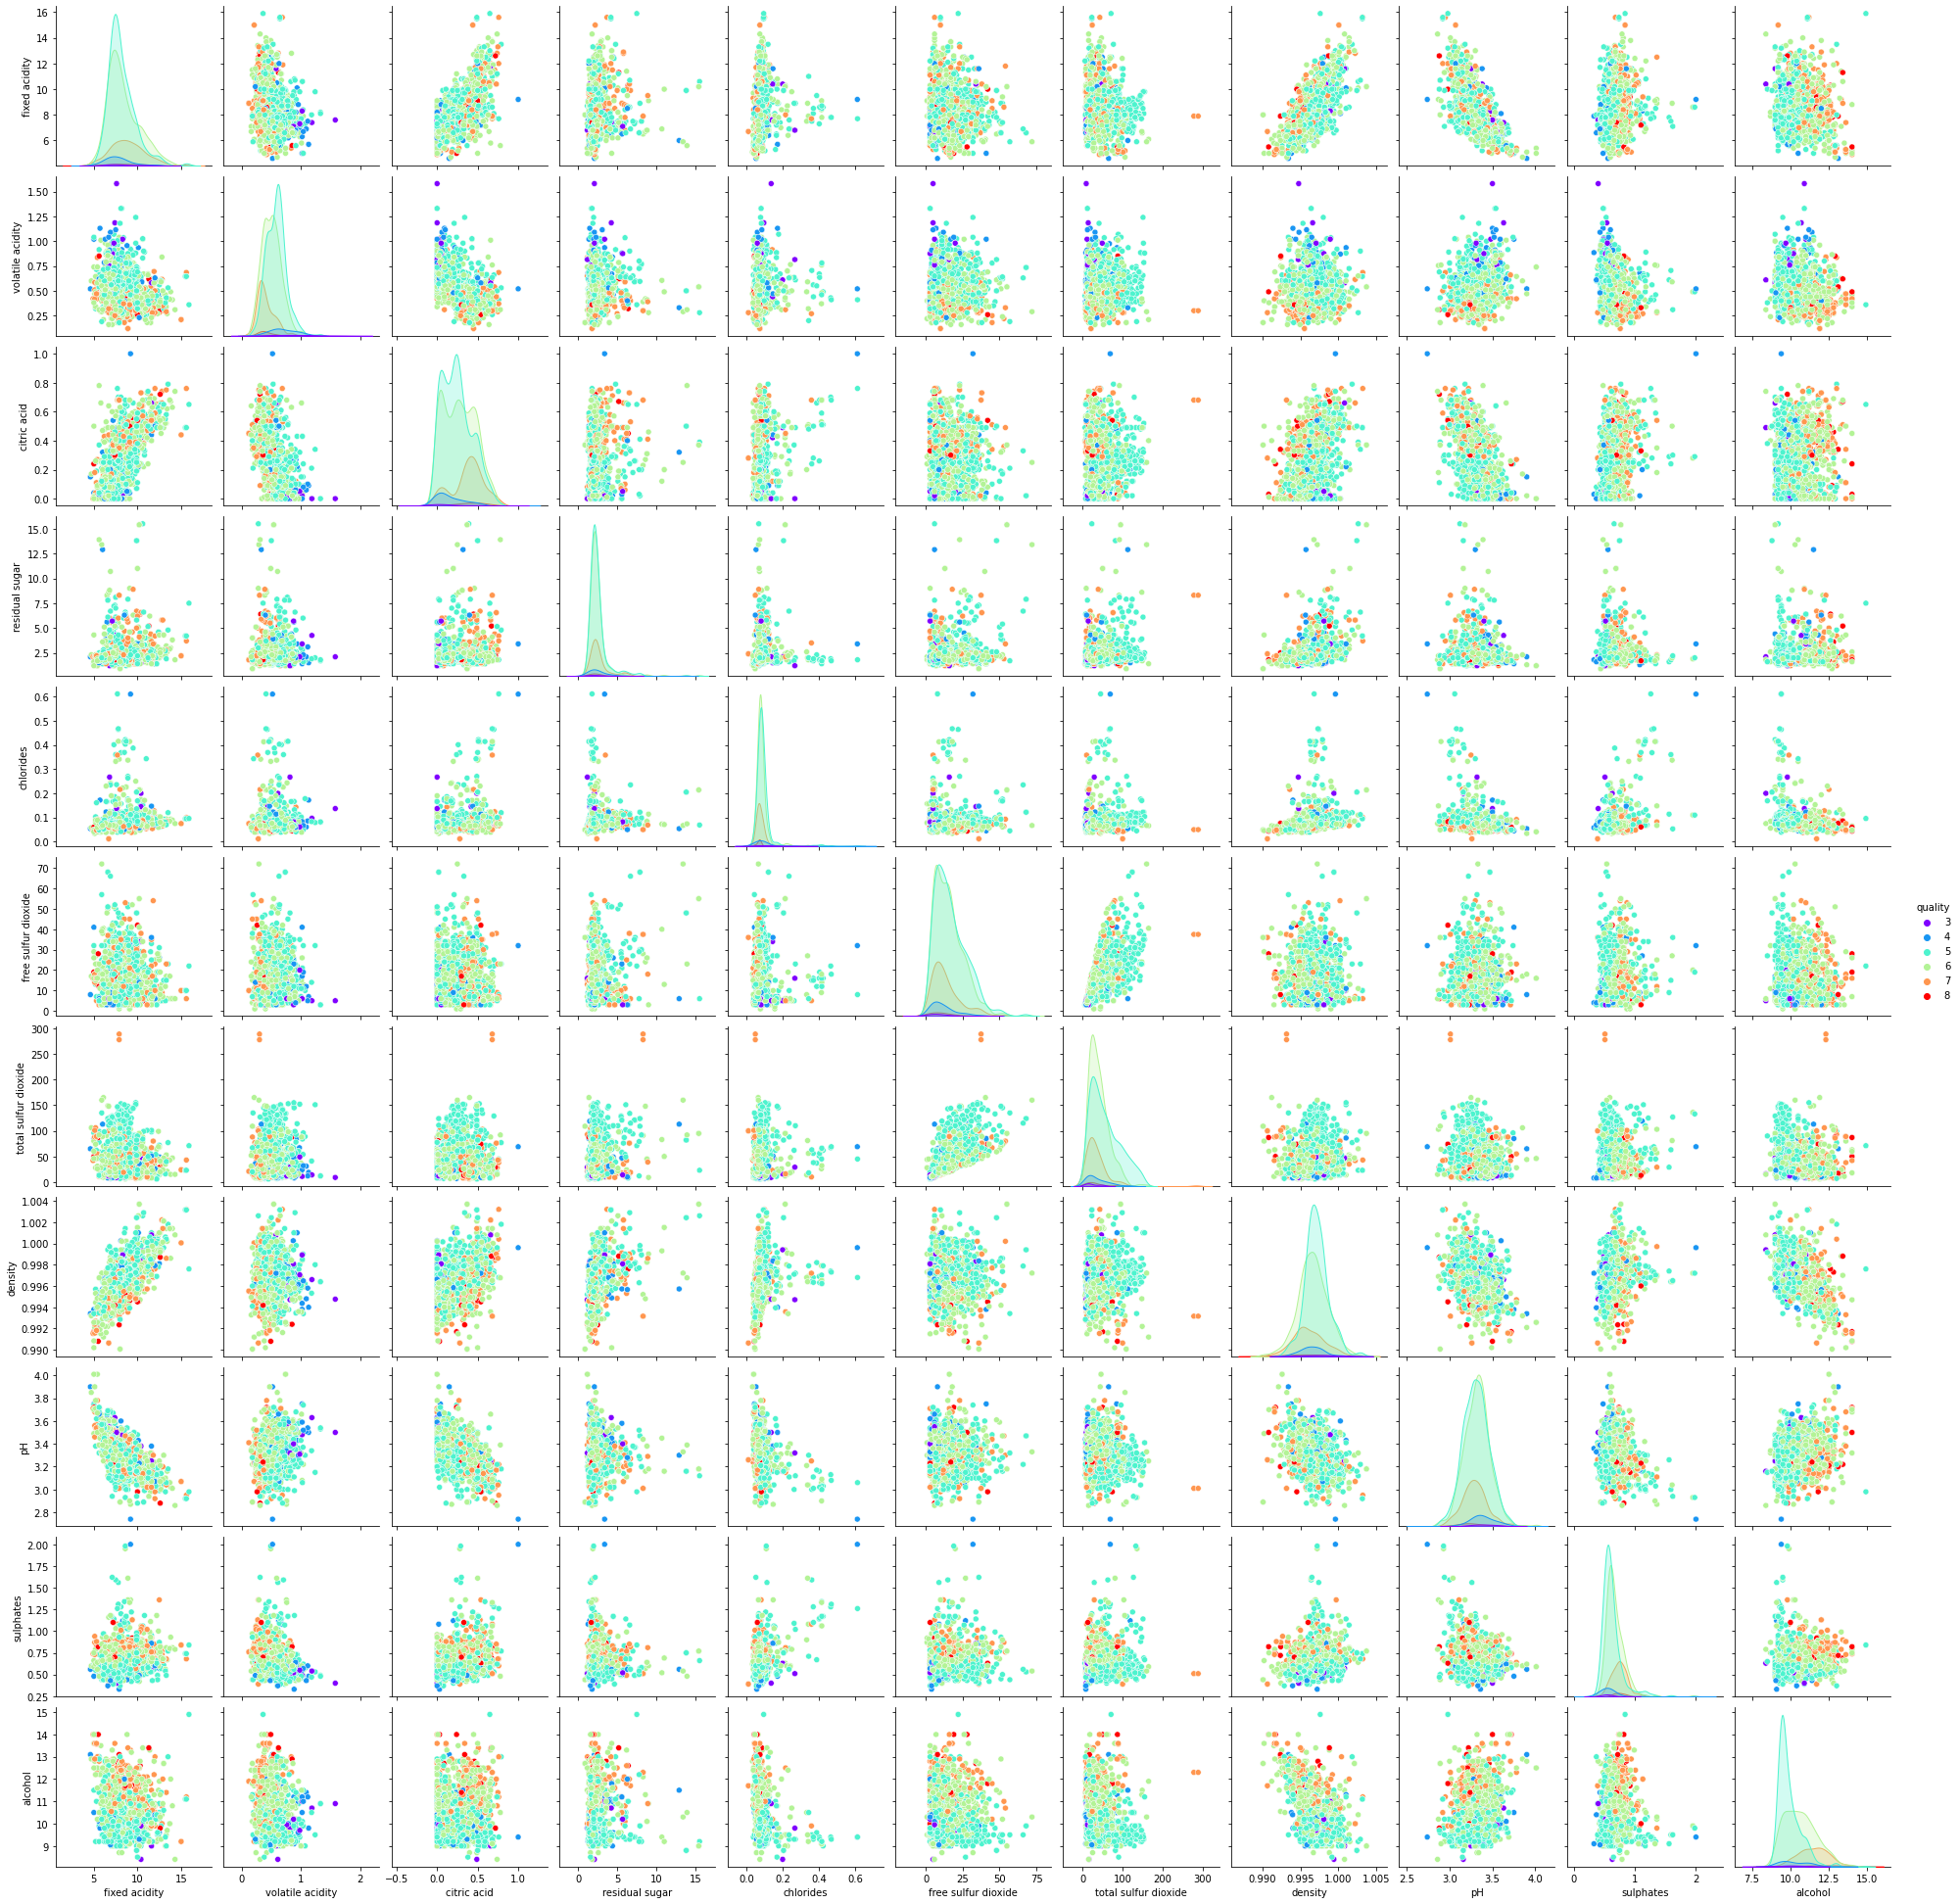

In [11]:
sns.pairplot(wine_dataset, hue = 'quality',palette='rainbow')

In [12]:
cor=wine_dataset.corr()

<AxesSubplot:>

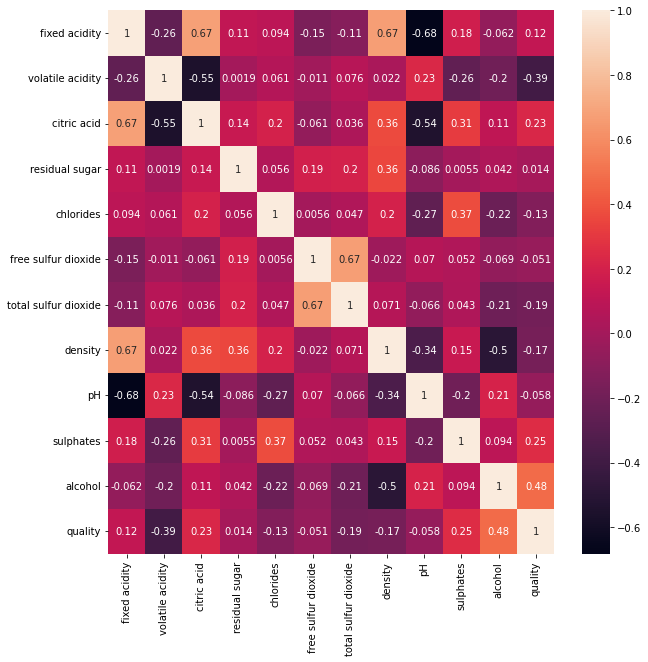

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(cor,annot=True)

In [15]:
X = wine_dataset.drop('quality',axis=1)
Y = wine_dataset['quality']

In [16]:
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

In [ ]:
# Y.value_counts()

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,stratify=Y)

In [19]:
model = RandomForestClassifier()

In [20]:
model.fit(X_train, Y_train)

RandomForestClassifier()

In [21]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [22]:
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.6770833333333334


In [28]:
input_data = (8.1,0.575,0.22,2.1,0.077,12.0,65.0,0.9967,3.29,0.51,9.2)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

[5]


# Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()

In [30]:
lm.fit(X_train,Y_train)

LogisticRegression()

In [31]:
wish=lm.predict(X_test)

In [32]:
accuracy_score(Y_test,wish)

0.6

# SVM 

In [34]:
from sklearn import svm

In [35]:
classifier=svm.SVC(kernel='linear')

In [36]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [40]:
wish_test=classifier.predict(X_test)

In [42]:
accuracy_score(wish_test,Y_test)

0.5916666666666667

# KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
knn=KNeighborsClassifier(n_neighbors=36)

In [64]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=36)

In [65]:
pred=knn.predict(X_test)

In [66]:
accuracy_score(Y_test,pred)

0.60625

# error=[]
    
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i=knn.predict(X_test)
    error.append(np.mean(pred_i!=Y_test))

In [49]:
plt.figure(figsize=(100,60))

<Figure size 7200x4320 with 0 Axes>

<Figure size 7200x4320 with 0 Axes>

Text(0, 0.5, 'Error Rate')

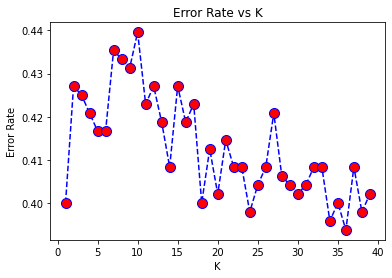

In [50]:
plt.plot(range(1,40),error,color='blue',linestyle='--',marker='o',markerfacecolor='red',markersize=10)
plt.title("Error Rate vs K")
plt.xlabel('K')
plt.ylabel('Error Rate')

# Decision Tree Classifier

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
dt=DecisionTreeClassifier()

In [71]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
accuracy_score